In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [2]:
#Dataset Paths (update to your location)
base_dir = r"C:\Users\sasan\Downloads\DL TASKs\intel Dataset"
train_dir = os.path.join(base_dir, "seg_train")
test_dir = os.path.join(base_dir, "seg_test")
pred_dir = os.path.join(base_dir, "seg_pred")  # optional


In [3]:
#Data Preprocessing (Efficient)
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # split 20% for validation
)


In [4]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 11230 images belonging to 6 classes.


In [5]:
val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2804 images belonging to 6 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 3000 images belonging to 6 classes.


In [19]:
#build CNN Model
model = Sequential([
    # Conv Block 1
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    # Conv Block 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Conv Block 3
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten + Dense
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_gen.num_classes, activation='softmax')
])


In [8]:
#Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 296s 842ms/step - accuracy: 0.4622 - loss: 1.3377 - val_accuracy: 0.5924 - val_loss: 1.0947
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 184s 526ms/step - accuracy: 0.5723 - loss: 1.0997 - val_accuracy: 0.6323 - val_loss: 0.9653
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 173s 493ms/step - accuracy: 0.6085 - loss: 1.0338 - val_accuracy: 0.6462 - val_loss: 0.9356
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 170s 485ms/step - accuracy: 0.6383 - loss: 0.9634 - val_accuracy: 0.6755 - val_loss: 0.8846
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 159s 454ms/step - accuracy: 0.6508 - loss: 0.9330 - val_accuracy: 0.6837 - val_loss: 0.8661


In [10]:
#Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 421ms/step - accuracy: 0.7130 - loss: 0.8088

 Test Accuracy: 71.30%


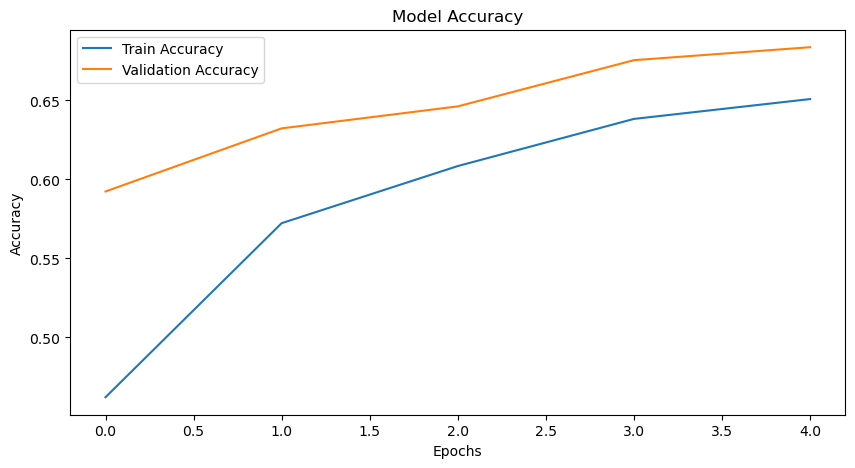

In [11]:
#Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

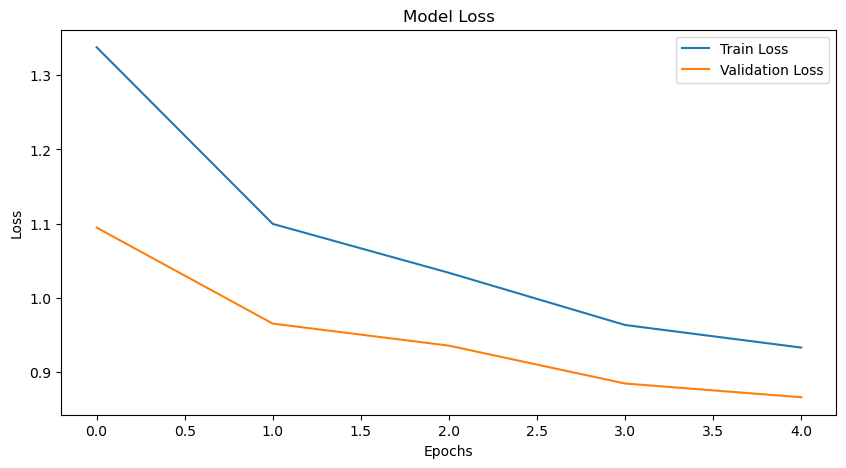

In [12]:
#plot loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
#Save Model
model.save("intel_cnn_model.h5")
print("CNN Model saved successfully as intel_cnn_model.h5")

CNN Model saved successfully as intel_cnn_model.h5


In [16]:
# Predict images from seg_pred folder (Intel CNN Model)
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to your dataset and model
base_dir = r"C:\Users\sasan\Downloads\DL TASKs\intel Dataset"
pred_dir = os.path.join(base_dir, "seg_pred")
model_path = "intel_cnn_model.h5"

# Load your trained CNN model
model = tf.keras.models.load_model(model_path)

# Class labels (same as folders)
class_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Loop through all images in seg_pred
for img_name in os.listdir(pred_dir):
    img_path = os.path.join(pred_dir, img_name)

    # Skip if not an image
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    # Preprocess the image
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    print(f"{img_name} → Predicted: {class_labels[class_index]} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
🖼️ 10004.jpg → Predicted: forest (71.91% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
🖼️ 10005.jpg → Predicted: mountain (71.15% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
🖼️ 10012.jpg → Predicted: street (72.89% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
🖼️ 10013.jpg → Predicted: glacier (52.95% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
🖼️ 10017.jpg → Predicted: buildings (30.07% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
🖼️ 10021.jpg → Predicted: forest (99.99% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
🖼️ 1003.jpg → Predicted: sea (40.36% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
🖼️ 10034.jpg → Predicted: glacier (85.76% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🖼️ 10038.jpg → Predicted: sea (65.66% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
🖼️ 10040.jpg → Predicted: street (74.66% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🖼️ 10043.jpg → Predicted: sea (61.31% confidence)
1/

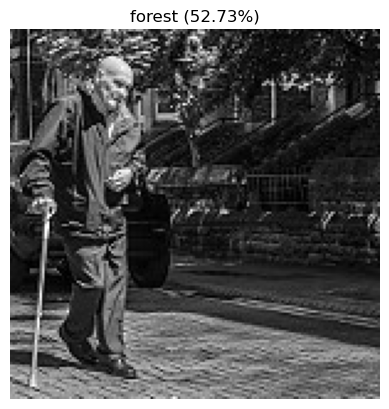

In [17]:
# Show the image with prediction
plt.imshow(load_img(img_path))
plt.title(f"{label} ({confidence:.2f}%)", fontsize=12)
plt.axis('off')
plt.show()